<a href="https://colab.research.google.com/github/Shikha18Shukla/Machine_Learning_repo/blob/main/lab_6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experminet 6 : SVM**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45

Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]


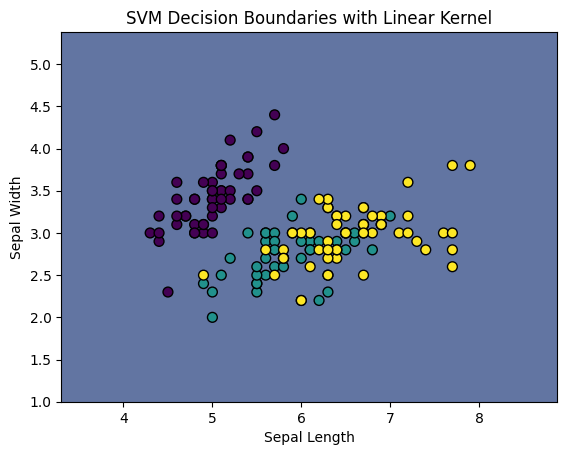

In [ ]:
# Create a mesh grid for plotting decision boundaries
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundaries
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title("SVM Decision Boundaries with Linear Kernel")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
